# Estresse concentrado em dois buraco circular

Modelagem compucational do comportamento da tensão concentrada sobre dois buracos circulares em uma placa.

### Importar pacotes

In [32]:
import numpy as np
import matplotlib.pyplot as plt

### Parâmetros

In [33]:
# Estresse aplicado em MPa
sigma = 100

# Raio do buraco em mm
radius = 20

# Posição X dos buracos
hole1_x = -1.25 * radius
hole2_x = 1.25 * radius

# Distancia entre os furos
distance_between_holes = abs(hole1_x) + abs(hole2_x) - 2 * radius

### Gerar malha de grade

In [34]:
x = np.linspace(-200, 200, 800)
y = np.linspace(-50, 50, 400)
X, Y = np.meshgrid(x, y)

### Computa as distâncias radiais e ângulos para os buracos

In [35]:
r1 = np.sqrt((X - hole1_x)**2 + Y**2)
theta1 = np.arctan2(Y, X - hole1_x)

r2 = np.sqrt((X - hole2_x)**2 + Y**2)
theta2 = np.arctan2(Y, X - hole2_x)

### Computa o campo de estresse ao redor dos buracos

Calcula as componentes de tensões

In [36]:
def compute_stress(r, theta):
  T_radial = (sigma / 2) * (1 - radius**2 / r**2) + (sigma / 2) * (1 + 3 * radius**4 / radius**4 - 4 * radius**2 / radius**2) * np.cos(2 * theta)
  T_shear = - (sigma / 2) * (1 - 3 * radius**4 / r**4 + 2 * radius**2 / r**2) * np.sin(2 * theta)
  T_theta = (sigma / 2) * (1 + radius**2 / r**2) - (sigma / 2) * (1 + 3 * radius**4 / r**4) * np.cos(2 * theta)
  return T_radial, T_shear, T_theta

In [37]:
T_radial_1, T_shear_1, T_theta_1 = compute_stress(r1, theta1)
T_radial_2, T_shear_2, T_theta_2 = compute_stress(r2, theta2)

Calcula as tensões de interação entre os buracos

In [38]:
def compute_hole_interaction_radial(theta, r):
  return (sigma * radius**2 / distance_between_holes**2) * np.cos(2 * theta)

In [39]:
def compute_hole_interaction_shear(theta, r):
  return (sigma * radius**2 / distance_between_holes**2) * np.sin(2 * theta)

In [40]:
def compute_hole_interaction_theta(theta, r):
  return - (sigma * radius**2 / distance_between_holes**2) * np.cos(2 * theta)

In [41]:
tension_interaction_radial_hole1 = compute_hole_interaction_radial(theta1, r1)
tension_interaction_radial_hole2 = compute_hole_interaction_radial(theta2, r2)

In [42]:
tension_interaction_shear_hole1 = compute_hole_interaction_shear(theta1, r1)
tension_interaction_shear_hole2 = compute_hole_interaction_shear(theta2, r2)

In [43]:
tension_interaction_theta_hole1 = compute_hole_interaction_theta(theta1, r1)
tension_interaction_theta_hole2 = compute_hole_interaction_theta(theta2, r2)

Calcula a tensão total

In [44]:
T_hole1 = T_radial_1 + T_shear_1 + T_theta_1 + tension_interaction_radial_hole1 + tension_interaction_shear_hole1 + tension_interaction_theta_hole1
T_hole2 = T_radial_2 + T_shear_2 + T_theta_2 + tension_interaction_radial_hole2 + tension_interaction_shear_hole2 + tension_interaction_theta_hole2

In [45]:
T_total = T_hole1 + T_hole2

Exclui as tensões dentro do buraco

In [46]:
r1 < radius

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [47]:
T_total[r1 < radius] = np.nan
T_total[r2 < radius] = np.nan

### Gráfico de tensões totais

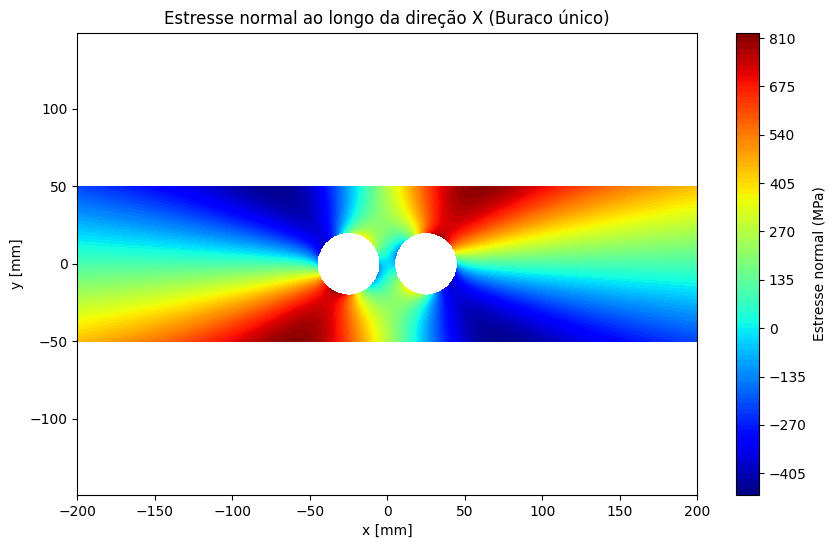

In [48]:
plt.figure(figsize=(10, 6))
contour = plt.contourf(X, Y, T_total, levels=100, cmap='jet')
plt.colorbar(contour, label='Estresse normal (MPa)')
plt.title('Estresse normal ao longo da direção X (Buraco único)')
plt.xlabel('x [mm]')
plt.ylabel('y [mm]')
plt.axis('equal')
plt.grid(False)

### Gráfico de tensão radial

In [49]:
T_hole_1 = T_radial_1
T_hole_1[r1 < radius] = np.nan

In [50]:
T_hole_2 = T_radial_2
T_hole_2[r2 < radius] = np.nan

In [51]:
T_radial = T_hole_1 + T_hole_2

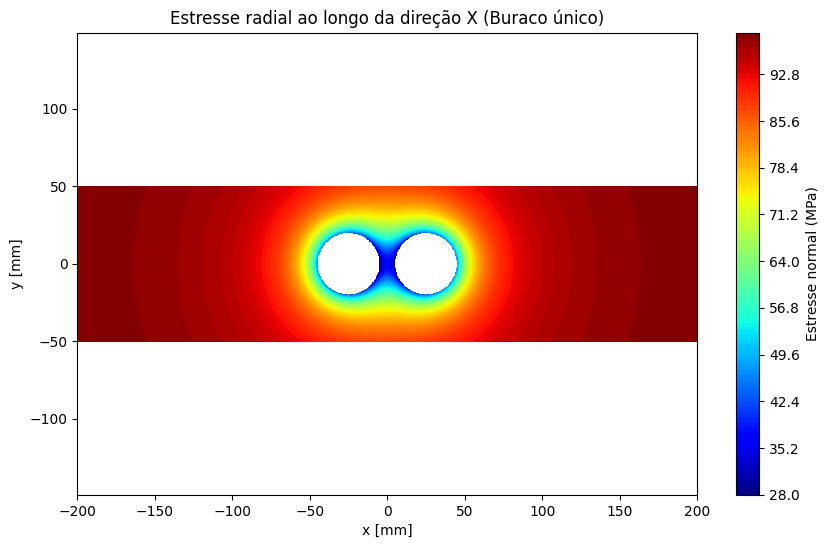

In [52]:
plt.figure(figsize=(10, 6))
contour = plt.contourf(X, Y, T_radial, levels=100, cmap='jet')
plt.colorbar(contour, label='Estresse normal (MPa)')
plt.title('Estresse radial ao longo da direção X (Buraco único)')
plt.xlabel('x [mm]')
plt.ylabel('y [mm]')
plt.axis('equal')
plt.grid(False)

### Gráfico da tensão cisalhante

In [53]:
T_hole_1 = T_shear_1
T_hole_1[r1 < radius] = np.nan

In [54]:
T_hole_2 = T_shear_2
T_hole_2[r2 < radius] = np.nan

In [55]:
T_shear = T_hole_1 + T_hole_2

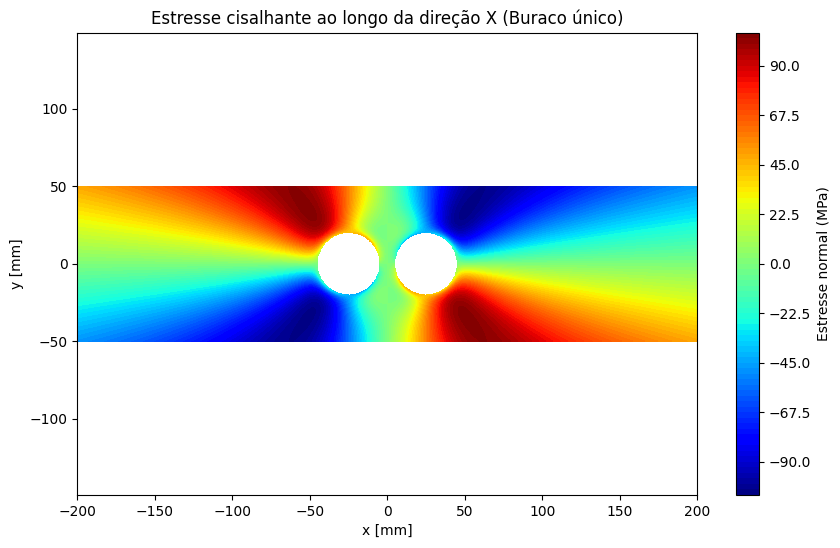

In [56]:
plt.figure(figsize=(10, 6))
contour = plt.contourf(X, Y, T_shear, levels=100, cmap='jet')
plt.colorbar(contour, label='Estresse normal (MPa)')
plt.title('Estresse cisalhante ao longo da direção X (Buraco único)')
plt.xlabel('x [mm]')
plt.ylabel('y [mm]')
plt.axis('equal')
plt.grid(False)

### Gráfico de tensão circunferêncial

In [57]:
T_hole_1 = T_theta_1
T_hole_1[r1 < radius] = np.nan

In [58]:
T_hole_2 = T_theta_2
T_hole_2[r2 < radius] = np.nan

In [59]:
T_theta = T_hole_1 + T_hole_2 + tension_interaction_theta_hole1 + tension_interaction_theta_hole2

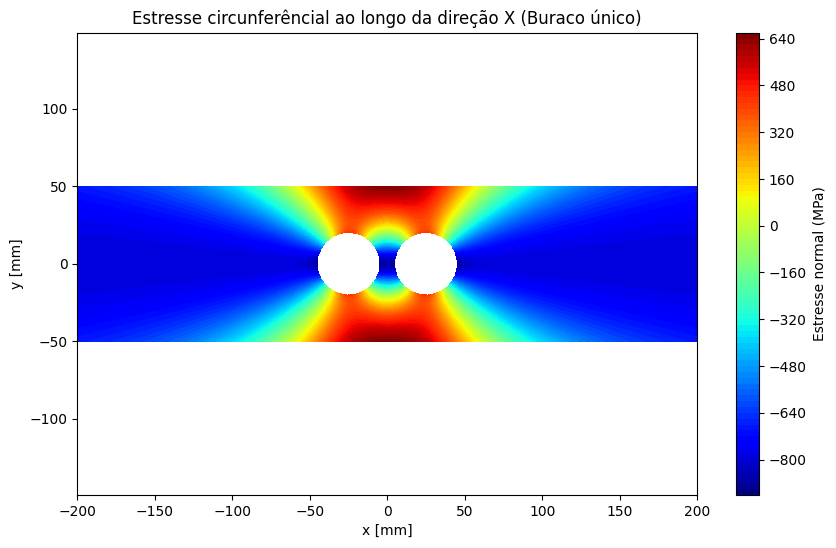

In [60]:
plt.figure(figsize=(10, 6))
contour = plt.contourf(X, Y, T_theta, levels=100, cmap='jet')
plt.colorbar(contour, label='Estresse normal (MPa)')
plt.title('Estresse circunferêncial ao longo da direção X (Buraco único)')
plt.xlabel('x [mm]')
plt.ylabel('y [mm]')
plt.axis('equal')
plt.grid(False)